In [4]:
%matplotlib inline

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

np.random.seed(25)

In [36]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train: trainning data
# y_train: labels of each trainning data
# x_test: testing data
# y_test: labels of each testing data

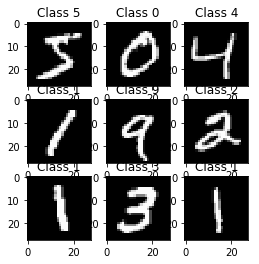

In [37]:
plt.figure(figsize=(4,4))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title("Class %s" %y_train[i])

In [38]:
# add channel
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [13]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.show()

In [27]:
from keras.utils import *
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

In [40]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation="relu", padding="same", data_format="channels_last", input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation="relu", padding="same", data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2,2), data_format="channels_last"))

model.add(Conv2D(64, (3,3), activation="relu", padding="same", data_format="channels_last"))
model.add(Conv2D(64, (3,3), activation="relu", padding="same", data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2,2), data_format="channels_last"))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))

In [41]:
layer_utils.print_summary(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
__________

In [42]:
# 定義訓練方式
# loss function: 交叉熵
# optimizer: Adam
# 評估模型: 準確率
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [43]:
# 開始訓練
y_train_onehot = np_utils.to_categorical(y_train)
train_history = model.fit(x_train, y_train_onehot, validation_split=0.2, epochs=3, batch_size=10, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 417s - loss: 14.5056 - acc: 0.1000 - val_loss: 14.5775 - val_acc: 0.0956
Epoch 2/3
11800/48000 [======>.......................] - ETA: 265s - loss: 14.3970 - acc: 0.1068

KeyboardInterrupt: 